## Unraveling the Power of Matplotlib's `Figure.subplot_mosaic`

One of the critical challenges that Python programmers often face while working with Matplotlib, the popular data visualization library, involves the handling of subplots. Creating complex layouts of subplots used to be a somewhat arduous task. Enter Figure.subplot_mosaic, introduced in Matplotlib 3.3, which has forever changed this landscape.

Before delving into the `Figure.subplot_mosaic`, let's take a quick look at the standard method of creating subplots and its associated problems.

### Standard Approach: plt.subplots

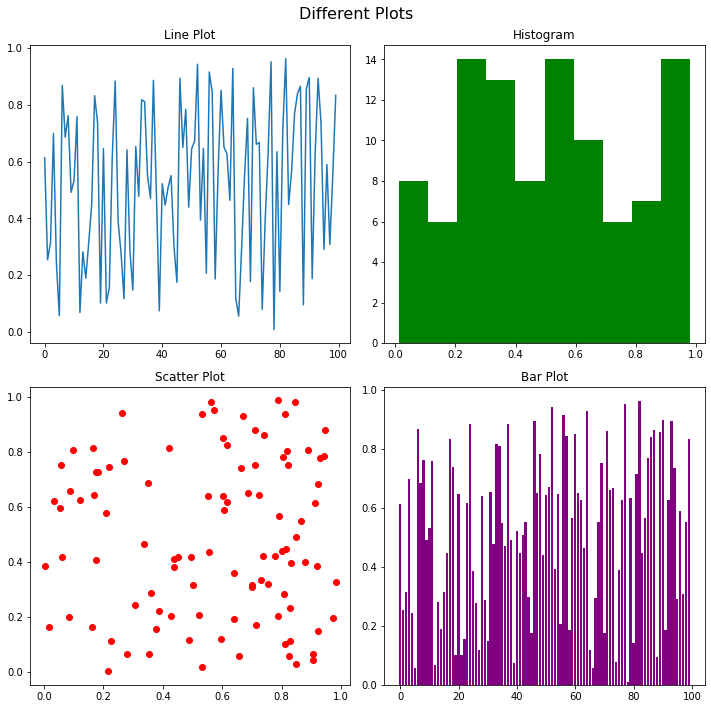

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Generating random data for plots
data = np.random.random((4, 100))

# Creating a 2x2 grid of Axes
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Plotting on individual subplots
axs[0, 0].plot(data[0])
axs[0, 0].set_title('Line Plot')

axs[0, 1].hist(data[1], color='green')
axs[0, 1].set_title('Histogram')

axs[1, 0].scatter(data[2], data[3], color='red')
axs[1, 0].set_title('Scatter Plot')

axs[1, 1].bar(np.arange(100), data[0], color='purple')
axs[1, 1].set_title('Bar Plot')

# Adding main title
fig.suptitle('Different Plots', fontsize=16)

# Adjusting the layout for better view
plt.tight_layout()
plt.show()

### Shortcomings of the standard method

While this approach may seem intuitive for simple grid structures, it quickly becomes less practical and increasingly convoluted for complex layouts. When dealing with grids that aren't uniformly structured, you'll likely have to resort to `GridSpec`, `subplot2grid`, or `add_subplot`, each with its own idiosyncrasies and limitations. Even then, creating irregular layouts can be confusing and often results in less readable code. If you have ever done this before you will know what I mean.

### The solution: `Figure.subplot.mosaic`

The subplot_mosaic function provides an elegant and readable way to create complex subplot arrangements. Instead of thinking about subplot grids numerically, you consider them in terms of a layout pattern. You provide a visual layout represented as a list of lists (or a 2D numpy array) of strings, where each string represents a subplot. Each unique string corresponds to a unique subplot, while repeated strings across the layout will create larger subplots spanning across the repeated locations.

An example will help with understanding this:

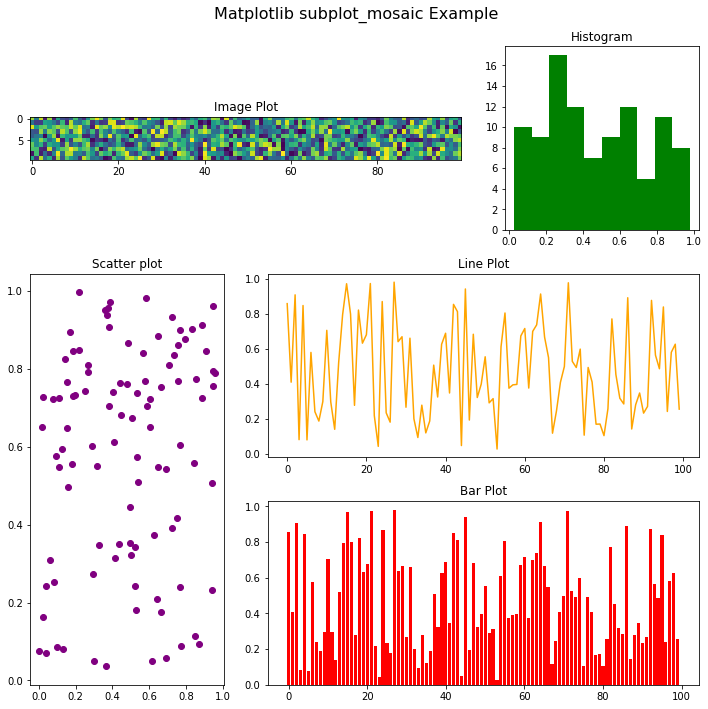

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Create layout
layout = [
    ["A", "A", "B"],
    ["C", "D", "D"],
    ["C", "E", "E"]
]

fig, axd = plt.subplot_mosaic(layout, figsize=(10,10))

# Generate some random data

data = np.random.random((10,100)) 

# Plot the data on the subplots

axd['A'].imshow(data) # creates a 2-D image
axd['A'].set_title('Image Plot')

axd['B'].hist(data[0], color='green') # creates a histogram off all the data flattened to a 1-D array
axd['B'].set_title('Histogram')

axd['C'].scatter(data[1, :], data[2, :], color='purple') # scatter plot with second and third columns 
axd['C'].set_title('Scatter plot')

axd['D'].plot(data[0], color='orange') # generate a lineplot of the first row of data
axd['D'].set_title('Line Plot')

axd['E'].bar(np.arange(100), data[0], color='red')
axd['E'].set_title('Bar Plot')

# Add main title

fig.suptitle('Matplotlib subplot_mosaic Example', fontsize=16)

# Adjusting the layout for better view
plt.tight_layout()
plt.show()


The variable `axd` is a dictionary where keys are the unique identifiers ('A', 'B', 'C', etc.) and values are the corresponding subplot instances. In the above instance `A`, `D` and `E` span 2 columns and `C` spans two rows. How cool?

### Why `subplot_mosaic` rocks

- Visual Representation: The visual layout used to create the subplots can be easily understood at a glance. This layout essentially serves as a form of documentation for your subplot grid.

- Simplicity: The use of characters as unique identifiers simplifies the process of referencing individual subplots when plotting. This removes the need to keep track of subplot indexes.

- Flexibility: With subplot_mosaic, you can easily create complex subplot layouts that aren't necessarily uniform grids. This is a massive improvement in terms of flexibility and functionality.

Readability: The overall readability of your code is significantly enhanced. This can be particularly beneficial when working with complex plotting scripts, as it will help other users (or your future self) understand the code more quickly and accurately.



### When it rocks less to use `subplot_mosaic`

While `subplot_mosaic` is a powerful tool that can significantly improve the readability of your code and ease the creation of complex layouts, there are still scenarios where other methods might be more suitable. Here are a few situations where you might prefer not to use subplot_mosaic:

- Simple, Regular Grids: If you're creating a simple, regular grid of subplots, using the traditional plt.subplots function can be quicker and more straightforward. The subplot_mosaic function really shines when dealing with complex or irregular layouts, but for a regular grid, it may add unnecessary complexity.

- Dynamic Layout Creation: If you need to create your layout dynamically, based on some data or conditions, it may be easier to use other methods, like `plt.subplot`, `plt.subplots`, or `GridSpec`. Creating a dynamic layout with subplot_mosaic can be cumbersome, as you would need to dynamically generate the layout array first (which is not ACTUALLY that hard, incidentally!)

- Advanced Plot Customizations: While subplot_mosaic is improving with each new version of Matplotlib it might not support some of the more advanced customizations that can be done with other methods, like `GridSpec`. If you need precise control over subplot sizes, aspect ratios, or more, it might be better to stick with those methods.

- Performance Concerns: If you're creating a very large number of subplots, it's possible that using subplot_mosaic could be slower than other methods, as it does some additional processing to create the layout and map the Axes objects to identifiers. However, this is generally only a concern for very large numbers of subplots.

### Finally

Remember, the best tool for the job often depends on the specific task and the individual programmer's preferences. It's always a good idea to familiarize yourself with the different options available so you can choose the most effective one for your situation. I, personally, have found that its speeds up my workflow and output in a way that I am so so grateful for (I truly battle with the advanced configurations!).

If you want to read more, head over to Matplotlib's [official documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot_mosaic.html)